In [1]:
#importing relevant libraries

from zaber_motion import Library
from zaber_motion.ascii import Connection
Library.enable_device_db_store()

from zaber_motion import Units
from controller import Imager

import cv2
import numpy as np

import matplotlib.pyplot as plt

#not sure what this is
#%matplotlib notebook

In [2]:
imager = Imager()

Found 1 devices
Devices IDs - ['101936']


In [3]:
#sets up acquisition

imager._start_acquisitions()
imager.cams[-1].remote_device.node_map.ExposureAuto.value = 'Off'
PIXELFORMATS = {'8':'Mono8','12':'Mono12Packed'}
PIXELFORMAT = PIXELFORMATS['12']
imager.update_params(ExposureTime=3500, PixelFormat=PIXELFORMAT)#, AcquisitionFrameRate = 50)

In [15]:
#for loop
#moves the gimbal and takes pictures, such that the light reaches all the pixels in the picture
#borders were chosen manually

  #borders according to the gimbal setup on 20/12/21:
  #borders named according to the gimbal, the light will be seen on the opposite "side"
  #left border: -19
  #right border: 19
  #top border: 16
  #bottom border: -13
  #step in X: 3 degrees
  #step in Y: 3 degrees



#declaring variables for borders
len_for_left = -19
len_for_right = 19
len_for_move_x = 3
num_for_row = int((abs(len_for_left)+abs(len_for_right)) / len_for_move_x)
len_for_move_y=3
len_for_up = 16
len_for_bottom = -13
num_for_col = int((abs(len_for_up)+abs(len_for_bottom))/len_for_move_y)

#connection to the gimbal

with Connection.open_serial_port("COM3") as connection: #changed to com3 from com4
    device_list = connection.detect_devices()
    print("Found {} devices".format(len(device_list)))
   
    #get axes
    vertical = device_list[1].get_axis(1) #axis Y
    horizontal = device_list[0].get_axis(1) #axis X
   
    #starting point
    horizontal.move_absolute(len_for_right, Units.ANGLE_DEGREES)
    vertical.move_absolute(len_for_up, Units.ANGLE_DEGREES)
   
    #initialization
    isimages = np.zeros([2048,2448]) 
    images = np.zeros([2048,2448])
    
    
    #scans the frame and takes pictures
    for cstep in range(num_for_col):
        for rstep in range(num_for_row):
            
            #checkpt is a tuple with 2 matrices
            #images: contains the sum of the light values from all the images
            #isimages: contains the number of times a certain pixel surviced the threshold
            
            (isimages, images), mean = imager.capture_sequence_and_get_cover(num_frames = 5, sleep_seconds1 = 0, 
                    sleep_seconds2 =0, frames_per_round=5, chckpt=(isimages, images))
            horizontal.move_relative(-1*len_for_move_x, Units.ANGLE_DEGREES)
           
           
        #horizontal.move_absolute(0, Units.ANGLE_DEGREES)
        horizontal.move_absolute(len_for_right, Units.ANGLE_DEGREES)
        vertical.move_relative(len_for_move_y, Units.ANGLE_DEGREES)


Found 2 devices
0 - 2021-12-29 11:06:48.186799 - 101936 captured Mono12Packed image 
1 - 2021-12-29 11:06:48.435356 - 101936 captured Mono12Packed image 
2 - 2021-12-29 11:06:48.676359 - 101936 captured Mono12Packed image 
3 - 2021-12-29 11:06:48.910844 - 101936 captured Mono12Packed image 
4 - 2021-12-29 11:06:49.151654 - 101936 captured Mono12Packed image 
0 - 2021-12-29 11:06:50.273848 - 101936 captured Mono12Packed image 
1 - 2021-12-29 11:06:50.557204 - 101936 captured Mono12Packed image 
2 - 2021-12-29 11:06:50.827590 - 101936 captured Mono12Packed image 
3 - 2021-12-29 11:06:51.098425 - 101936 captured Mono12Packed image 
4 - 2021-12-29 11:06:51.322263 - 101936 captured Mono12Packed image 
0 - 2021-12-29 11:06:52.464760 - 101936 captured Mono12Packed image 
1 - 2021-12-29 11:06:52.756069 - 101936 captured Mono12Packed image 
2 - 2021-12-29 11:06:52.969814 - 101936 captured Mono12Packed image 
3 - 2021-12-29 11:06:53.241192 - 101936 captured Mono12Packed image 
4 - 2021-12-29 11:

KeyboardInterrupt: 

Changed the above code:

Previously, in the for loop
  #if i==0:
            #    chkpt = None
            #    i+=1
         #   else:
          #      chkpt = (isimages, images)

(-0.5, 2447.5, 2047.5, -0.5)

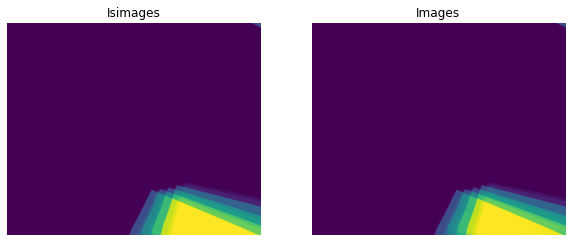

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (10,10))

im1 = ax[0].imshow(isimages)
ax[0].set_title('Isimages')
ax[0].axis('off')

im2 = ax[1].imshow(images)
ax[1].set_title('Images')
ax[1].axis('off')

In [14]:
with Connection.open_serial_port("COM3") as connection: #changed to com3 from com4
    device_list = connection.detect_devices()
    print("Found {} devices".format(len(device_list)))
   
    #get axes
    vertical = device_list[1].get_axis(1) #axis Y
    horizontal = device_list[0].get_axis(1) #axis X
   
    #starting point
   
    vertical.home()

Found 2 devices
